## Final Project Submission

Please fill out:
* Group members: Myra Kadenge, Edmund Nyaribo ,Frank Oyugi, Silvia Gworit
* Student pace: Full time Hybrid
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


## Overview
The real estate market in King County is characterized by its dynamic nature, driven by factors such as population growth, economic trends, and housing demand. The county's diverse geography offers a wide range of housing options, from  townhouses to suburban single-family homes and waterfront properties. The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create multiple regression models that can accurately predict the price of a house.

The project is commissioned by a commercial real estate agaency interested in assisting homeowners to buy or sell homes within specific areas. Their main concerns revolve around  obtaining predicted prices for homes in the area based on renovation and further assessing any notable disparities between the actual prices and our model's predicted prices.


# Business Understanding

The primary goal of the client is to create a platform that delivers accurate estimates of house prices which are crucial for both buyers and sellers in King county. To achieve this objective we need to develop a model that can identify the key factors influencing house prices. To effectively train this model the client requires precise and representative data related to the real estate market in king county, including historical sales, current listings, property size, and other relevant features.

Once trained successfully the model will be capable of providing accurate estimations of house values based on their features. It can then seamlessly integrate into the platform offering reliable price estimates to both buyers and sellers. 

This information derived from the model will empower buyers and sellers to make informed decisions regarding property transactions.
By leveraging technology to provide a dependable and precise platform for buying and selling houses in king county, the client aims to establish themselves as a trusted authority in the local real estate market thus attracting a loyal customer base.

QUESTIONS
1. What feature has the highest correlation to the home price?

2. Does the view from a home increase its estmated value?

3. What combinations of features leads to the highest values of homes?





# Data understanding
For this project, we will be using the King County House Sales dataset, which contains  20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project as it provides relevant information about the features that affect the house prices in King County.

The King County House Sales dataset contains the following columns;

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.

 

Some limitations of the data that may have implications for the project are:

The data may not reflect the current market conditions as it was collected from 2014 to 2015.

The data may not capture all the factors that affect the house prices such as the interest rates and the economic situation.

The data may have some outliers or errors that need to be handled carefully during the analysis.
 For example, there is a house with 33 bedrooms which seems unrealistic.

## Data preparation

In our data preparation process, we imported the necessary libraries, loaded the data, then proceeded to clean the data - dealing with null values and transforming the data as needed. Afterward, we visualized the data to identify correlations between the variables

In [77]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
import statsmodels.api as sm

In [78]:
#Loading the dataset
data=pd.read_csv('data/kc_house_data.csv', index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The dataset has 21597 entries and 20 columns. Most of the columns consist of numerical data which make it suitable for linear regression analysis.
The only columns with missing values is the year renovated column, waterfront and view hence we will handle the  missing values later on.

# Data preprocessing
In this section, we will prepare the data for the analysis by converting some of the categorical features such as waterfront into numeric ones. This will allow us to apply mathematical operations and statistical methods on the data.

We will also use pandas functions to convert the date feature from string to datetime format and extract only the year of sale. We will create a new column for sell year and drop the original date column.

Moreover there will be truncating of the bedrooms column as we cannot have half a bedroom.
And lastly handling of missing values if any.

In [81]:
#Waterfront' column transformation
#data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)
data['waterfront'] = data['waterfront'].map({'NO': 0, 'YES': 1}) 

In [82]:
#Changing the date to date time
data['date'] = pd.to_datetime(data['date'])
# Extracting only the year from the column Date
data.date = data['date'].dt.year

# Creating a new column for sell year
data['sell_yr'] = pd.to_datetime(data['date'],format='%Y').dt.year
data.drop(columns='date', inplace=True)

In [83]:
#Drop unnecessary columns to reduce the lneght of interpretation in our model
data.drop(columns=[ 'lat', 'long','sqft_lot15', 'zipcode', 'sqft_basement','sqft_living15', 'sqft_above'], inplace=True)

In [84]:
# Truncate the bedrooms bathrooms and floors columns as we cannot have 1/2 a bedroom, bathroom or floor.
def truncate_columns(data, columns):
    
    for column in columns:
        data[column] = data[column].apply(lambda x: int(x))
    
    return data



In [85]:
truncated_data= truncate_columns(data, ['bedrooms', 'bathrooms', 'floors'])


In [86]:
data.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sell_yr
id,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,NaN,NONE,Average,7 Average,1955,0.0,2014
6414100192,538000.0,3,2,2570,7242,2,0.0,NONE,Average,7 Average,1951,1991.0,2014
5631500400,180000.0,2,1,770,10000,1,0.0,NONE,Average,6 Low Average,1933,NaN,2015
2487200875,604000.0,4,3,1960,5000,1,0.0,NONE,Very Good,7 Average,1965,0.0,2014
1954400510,510000.0,3,2,1680,8080,1,0.0,NONE,Average,8 Good,1987,0.0,2015
7237550310,1230000.0,4,4,5420,101930,1,0.0,NONE,Average,11 Excellent,2001,0.0,2014
1321400060,257500.0,3,2,1715,6819,2,0.0,NONE,Average,7 Average,1995,0.0,2014
2008000270,291850.0,3,1,1060,9711,1,0.0,NaN,Average,7 Average,1963,0.0,2015
2414600126,229500.0,3,1,1780,7470,1,0.0,NONE,Average,7 Average,1960,0.0,2015


In [87]:
# Function for removing the Digits in the grade values
def extract_grade_desc(s):
    grade_desc = ''
    for char in s:
        if not char.isdigit() and char != ' ':
            grade_desc += char
    return grade_desc.strip()

data['grade'] = data['grade'].apply(lambda x: extract_grade_desc(x))

## Handling missing values
In this section, we will check the percentage of missing values in each column of the data and handle them accordingly.





In [88]:
#Check for missing values in a DataFrame and return a Data Frameshowing the percentage of missing values for each column.
    
def check_missing_values(data):
    
    # Check for missing values
    missing_values = (data.isnull().sum())/len(data) * 100
    
    # Create a DataFrame to display the count of missing values
    missing_df = pd.DataFrame({'Missing Values': missing_values})
    
    return missing_df
missing_df = check_missing_values(data)


In [89]:
missing_df 


,Missing Values
price,0.000000
bedrooms,0.000000
bathrooms,0.000000
sqft_living,0.000000
sqft_lot,0.000000
floors,0.000000
waterfront,11.001528
view,0.291707
condition,0.000000
grade,0.000000


The percentages of missing values are not too high. 

In [90]:
#Fill missing values of view with median and waterfront with 0
data['waterfront'].fillna(0, inplace=True)

#drop remaing misisng values in other columns
data.dropna(axis=0, inplace=True)


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         17704 non-null  float64
 1   bedrooms      17704 non-null  int64  
 2   bathrooms     17704 non-null  int64  
 3   sqft_living   17704 non-null  int64  
 4   sqft_lot      17704 non-null  int64  
 5   floors        17704 non-null  int64  
 6   waterfront    17704 non-null  float64
 7   view          17704 non-null  object 
 8   condition     17704 non-null  object 
 9   grade         17704 non-null  object 
 10  yr_built      17704 non-null  int64  
 11  yr_renovated  17704 non-null  float64
 12  sell_yr       17704 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.9+ MB


We chose to fill in the missing values of waterfront since it has the highest percentage. We filled in the missing values with 0 meaning the houses are not on waterfronts because if we drop the rows we would end up working with about 15000 entries of data which would be a huge decrease of data from having 21597 entries of data.

In [92]:
data.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sell_yr
id,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0.0,NONE,Average,Average,1955,0.0,2014
6414100192,538000.0,3,2,2570,7242,2,0.0,NONE,Average,Average,1951,1991.0,2014
2487200875,604000.0,4,3,1960,5000,1,0.0,NONE,Very Good,Average,1965,0.0,2014
1954400510,510000.0,3,2,1680,8080,1,0.0,NONE,Average,Good,1987,0.0,2015
7237550310,1230000.0,4,4,5420,101930,1,0.0,NONE,Average,Excellent,2001,0.0,2014
1321400060,257500.0,3,2,1715,6819,2,0.0,NONE,Average,Average,1995,0.0,2014
2414600126,229500.0,3,1,1780,7470,1,0.0,NONE,Average,Average,1960,0.0,2015
3793500160,323000.0,3,2,1890,6560,2,0.0,NONE,Average,Average,2003,0.0,2015
1736800520,662500.0,3,2,3560,9796,1,0.0,NONE,Average,Good,1965,0.0,2015


## Data Exploration

This is the phase in the EDA(Exploratory Data Analysis) process where we examine summary statistics,visualize distributions and identify correlations between variables.Additionally we can also perform a linearity check at this stage.


### List Of Columns

In [93]:
columns_list = data.columns.tolist()
for column_name in columns_list:
    print(column_name)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
yr_built
yr_renovated
sell_yr


### List Of Numerical Columns

In [94]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
columns_to_exclude = ['waterfront','yr_built','yr_renovated','sell_yr']

for column_to_exclude in columns_to_exclude:
    if column_to_exclude in numerical_columns:
        numerical_columns.remove(column_to_exclude)
print(numerical_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


## Linearity Check

We check for linearity in order to determine which idependent variables have a linear relationship with the target variable,which is the price.This is important beacause when performing linear regression,the linearity assumption must be satisfied and cannot be violated.If this assumption is violated,the model may fail to accurately capture the true relationship between the variables.

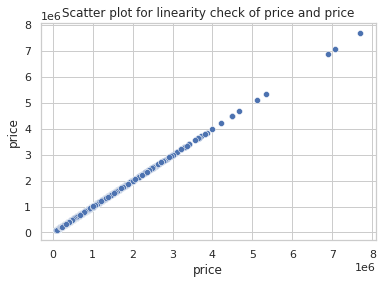

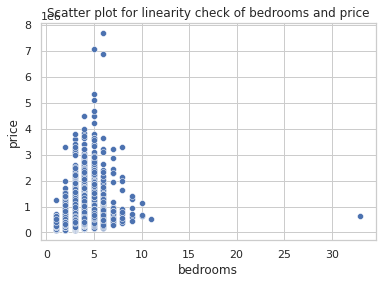

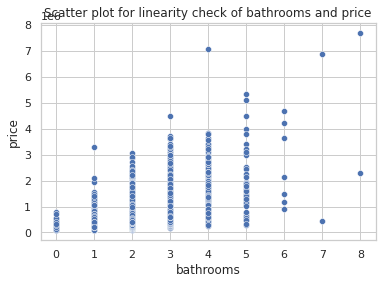

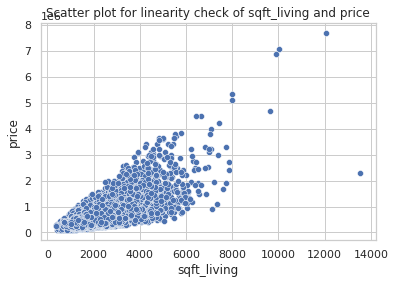

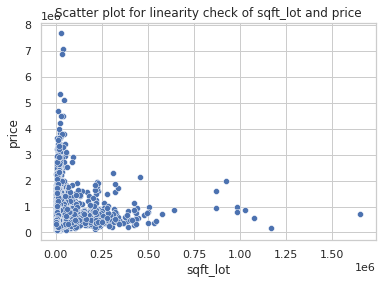

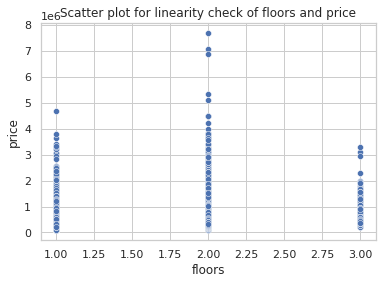

In [95]:
for column in numerical_columns:
    # Create scatter plot using Seaborn
    sns.scatterplot(x=column, y='price', data=data)
    
    # Label axes and title
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'Scatter plot for linearity check of {column} and price')
    
    # Display plot
    plt.show()


From the above scatter plots,we can see that there is a linear relationship between 'price' and 'sqft_living'.The other relationships are discontiuous.

## Correlation Check

Correlation checks are performed during data exploration to understand the relationship between the variables.Correlation analysis helps to identify the presence and stregth of the relationships between the variables.Uderstanding these relationships will be crucial for gaining insights into the underlying structure of the data.We can also use coreelation analysis to detect multicollinearity between variables.

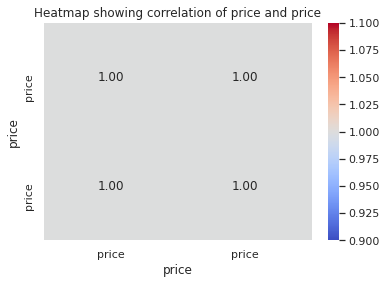

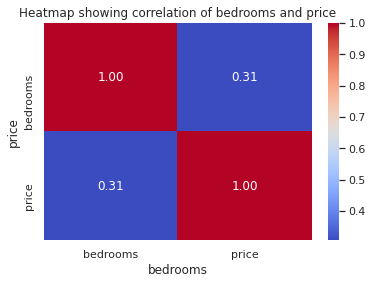

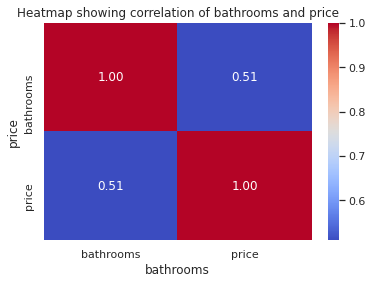

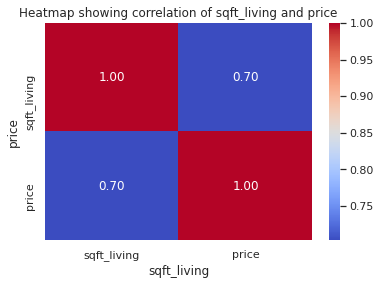

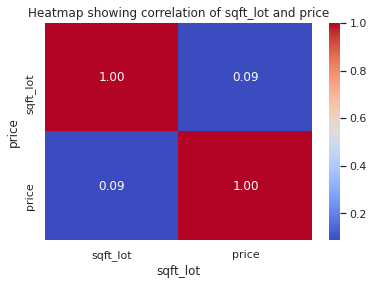

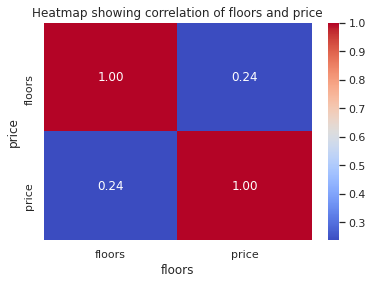

In [96]:
for column in numerical_columns:
    #create heatmaps
    sns.heatmap(data[[column,'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    #Label axes and title
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'Heatmap showing correlation of {column} and price')
    #Display heatmap
    plt.show()

From the heatmaps above,we can conclude that there is a positive corelation relationship between all numerical independent variables and the target variable,which is the price.This means that if any of these independent variables increases,the price will also increase.While all these relationships are positive,it is important to note that 'sqft_living' has the strongest positive relationship with 'price',meaning it can be a good predictor for it and 'sqft_lot' has the weakest postive relationship with 'price'

## Frequency Distribution

Frequency distribution refers to a table or graph the count of each distinct value or range of values in a dataset.It summarizes the distribution pf values in a dataset by showing how often each value occurs.We can represent this using a histogram.

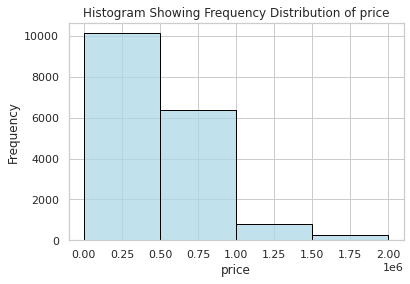

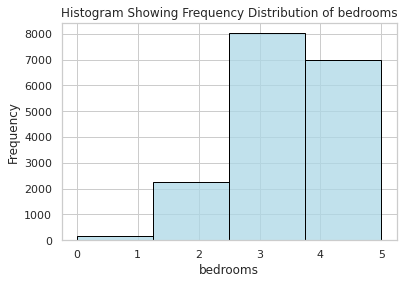

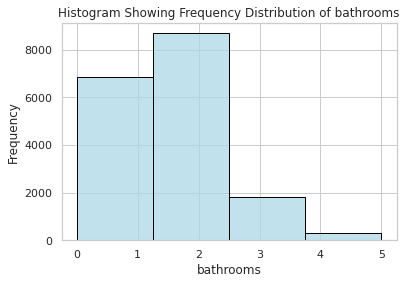

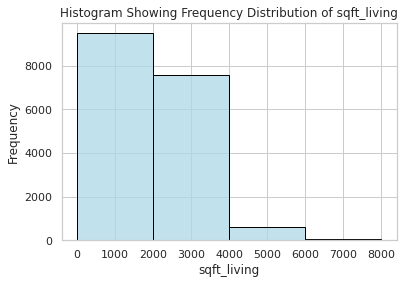

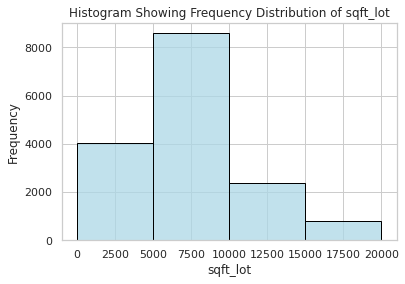

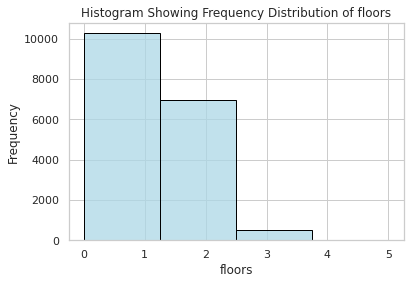

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, column in enumerate(numerical_columns):
    # Set the ranges
    if i == 0:
        range_min = 0
        range_max = 2000000
    elif i in [1, 2, 5]:
        range_min = 0
        range_max = 5
    elif i == 3:
        range_min = 0
        range_max = 8000
    elif i == 4:
        range_min = 0
        range_max = 20000
    
    # Create histogram using Seaborn
    sns.histplot(data=data, x=column, bins=4, binrange=(range_min, range_max), color='lightblue', edgecolor='black')
    
    # Label title and axes
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram Showing Frequency Distribution of {column}')
    
    # Display histogram
    plt.show()


From the above histogram plots,we can make some conclusions:  
1.Most houses cost between 200,000 and 500,000.  
2.Most houses have 3 bedrooms and 3 bathrooms.  
3.Most houses have about 1,000 square feet for living.  
4.Most houses have a lot square feet of 5,000 to 10,000 feet.

# Categorical Data Analysis

Categorical data is data that represents groups or categories.They are often represented using labels or strings rather than numerical values.Analyzing categorical data involves summarizing the frequency,comparing distributions and identifying patterns or associations.We can analyze categorical data using bar charts,which are graphical representations which display the frequency,proportion or count of each category using rectangular bars.We can also show how categorical variables relate to numerical variables using bar charts.In this dataset,we can see'condition','waterfront','view' and 'grade' as the columns representing categorical data.

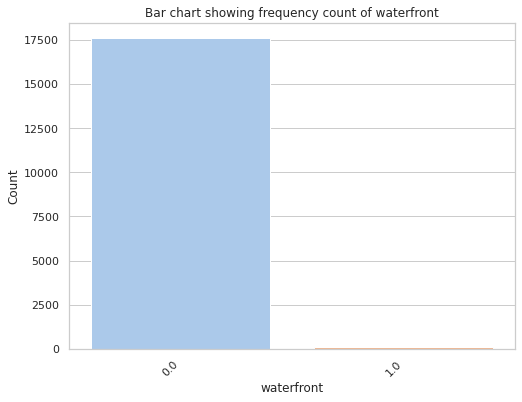

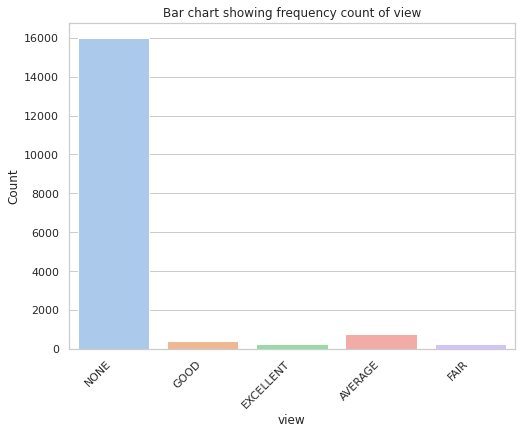

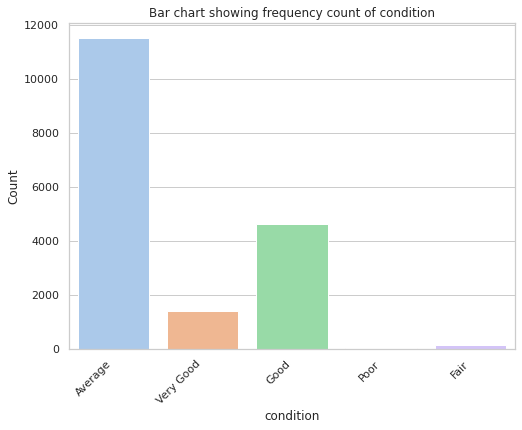

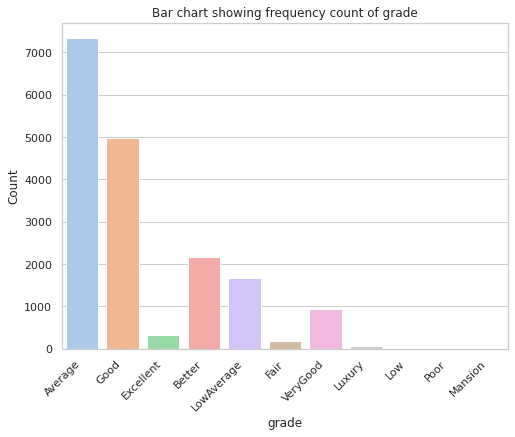

In [98]:
categorical_columns = ['waterfront', 'view', 'condition', 'grade']

#Set the Style
sns.set(style="whitegrid")

# Iterate over each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # create the bar chart
    sns.countplot(x=column, data=data, palette="pastel")
    
    # Label axes and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar chart showing frequency count of {column}')
    plt.xticks(rotation=45, ha='right')
    # Display the bar chart
    plt.show()


Looking at the bar charts above,we can make some observations:  
1.The chances of finding a house with a waterfront are almost zero.  
2.Most houses do not have a view.  
3.Most of the houses have an average grade and condition.  
4.Mansions are scarce in number.

### Relationship between grade and price

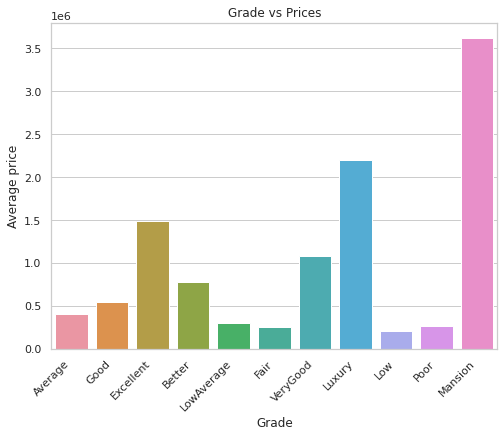

In [99]:
plt.figure(figsize=(8, 6))

# create the bar plot
sns.barplot(x='grade', y='price', data=data, ci=None)
# Set the x-axis label
plt.xlabel('Grade')
# Set the y-axis label
plt.ylabel('Average price')
# Set the title of the plot
plt.title('Grade vs Prices')
#Fix Overlapping
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


From the bar chart above,we can conclude that mansions fetch the highest prices while houses of poor or low grades fetch the lowest prices.

### Relationship between condition and price

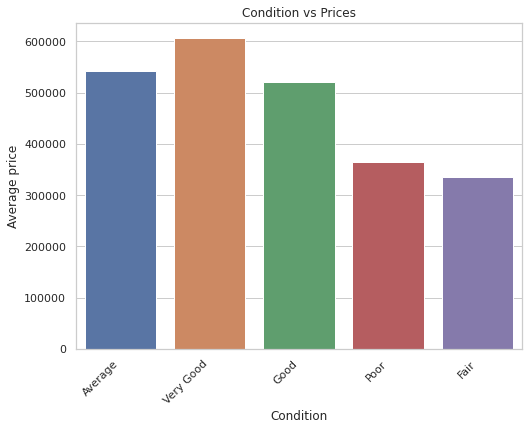

In [100]:
plt.figure(figsize=(8, 6)) 

# create the bar plot
sns.barplot(x='condition', y='price', data=data, ci=None)
# Set the x-axis label
plt.xlabel('Condition')
# Set the y-axis label
plt.ylabel('Average price')
# Set the title of the plot
plt.title('Condition vs Prices')
#Fix Overlapping
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


We can conclude that houses with in very good conditions fetch the highest prices while houses in poor or fair conditions are the cheapest.

### Relationship between waterfront and price

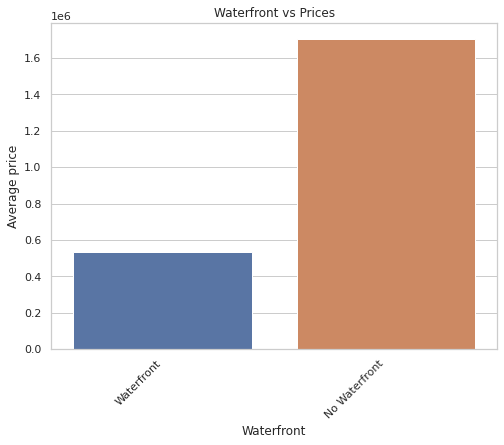

In [101]:
plt.figure(figsize=(8, 6))  # Set the figure size to (8, 6)

# create the bar plot
sns.barplot(x='waterfront', y='price', data=data, ci=None)
# Set the x-axis label
plt.xlabel('Waterfront')
# Set the y-axis label
plt.ylabel('Average price')
# Set the title of the plot
plt.title('Waterfront vs Prices')
#Fix Overlapping
plt.xticks(ticks=[0,1],labels=['Waterfront','No Waterfront'],rotation=45, ha='right')
# Display the plot
plt.show()


From the bar graph above,we can observe that houses without a waterfront sell for higher prices.

### Relationship between view and price

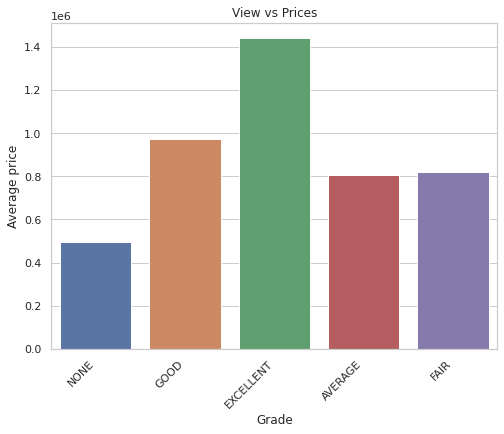

In [102]:
plt.figure(figsize=(8, 6))  # Set the figure size to (8, 6)

#create the bar plot
sns.barplot(x='view', y='price', data=data, ci=None)
# Set the x-axis label
plt.xlabel('Grade')
# Set the y-axis label
plt.ylabel('Average price')
# Set the title of the plot
plt.title('View vs Prices')
#Fix Overlapping
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


The bar graph above shows that houses with an excellent view are the most expensive and houses without a view are the cheapest.

## Data Modelling


## Creating a train/test

In [103]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sell_yr
id,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0.0,NONE,Average,Average,1955,0.0,2014
6414100192,538000.0,3,2,2570,7242,2,0.0,NONE,Average,Average,1951,1991.0,2014
2487200875,604000.0,4,3,1960,5000,1,0.0,NONE,Very Good,Average,1965,0.0,2014
1954400510,510000.0,3,2,1680,8080,1,0.0,NONE,Average,Good,1987,0.0,2015
7237550310,1230000.0,4,4,5420,101930,1,0.0,NONE,Average,Excellent,2001,0.0,2014


In [104]:
df = pd.get_dummies(data, columns=["view", "condition" , "grade"], drop_first=True, dtype=int)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,yr_renovated,sell_yr,...,grade_Better,grade_Excellent,grade_Fair,grade_Good,grade_Low,grade_LowAverage,grade_Luxury,grade_Mansion,grade_Poor,grade_VeryGood
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0.0,1955,0.0,2014,...,0,0,0,0,0,0,0,0,0,0
6414100192,538000.0,3,2,2570,7242,2,0.0,1951,1991.0,2014,...,0,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3,1960,5000,1,0.0,1965,0.0,2014,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2,1680,8080,1,0.0,1987,0.0,2015,...,0,0,0,1,0,0,0,0,0,0
7237550310,1230000.0,4,4,5420,101930,1,0.0,2001,0.0,2014,...,0,1,0,0,0,0,0,0,0,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 7129300520 to 1523300157
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                17704 non-null  float64
 1   bedrooms             17704 non-null  int64  
 2   bathrooms            17704 non-null  int64  
 3   sqft_living          17704 non-null  int64  
 4   sqft_lot             17704 non-null  int64  
 5   floors               17704 non-null  int64  
 6   waterfront           17704 non-null  float64
 7   yr_built             17704 non-null  int64  
 8   yr_renovated         17704 non-null  float64
 9   sell_yr              17704 non-null  int64  
 10  view_EXCELLENT       17704 non-null  int64  
 11  view_FAIR            17704 non-null  int64  
 12  view_GOOD            17704 non-null  int64  
 13  view_NONE            17704 non-null  int64  
 14  condition_Fair       17704 non-null  int64  
 15  condition_Good       1

In [106]:
# spliting the data into x and y
X = df.drop('price', axis = 1)
y = df['price']
X.shape , y.shape

((17704, 27), (17704,))

In [107]:
# Split the data into training and testing
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )
print("Training set shape: ", X_train.shape , y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (14163, 27) (14163,)
Testing set shape:  (3541, 27) (3541,)


In [108]:
# Create a basic linear regression model
lr = LinearRegression()

In [109]:
# Train the model on the training set
model =lr.fit(X_train, y_train)

In [110]:
#Make predictions based on the training set
y_predicted = lr.predict(X_test)
y_predicted.shape

(3541,)

In [111]:
# Evaluating the performance of the model

R_squared = r2_score(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
MAE = mean_absolute_error(y_test,y_predicted)
intercept = lr.intercept_

print('R_squared: ', R_squared)
print('MSE: ', MSE)
print('MAE: ', MAE)
print('intercept: ',intercept )

R_squared:  0.63294095371061
MSE:  51731331281.42515
MAE:  138025.63692848737
intercept:  -39132123.255265504


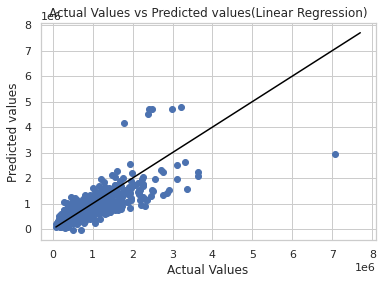

In [112]:
#Plot the model
plt.scatter(y_test, y_predicted)
plt.plot([y.min(), y.max()] ,[y.min(), y.max()] , color= 'black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual Values vs Predicted values(Linear Regression)')

plt.show()


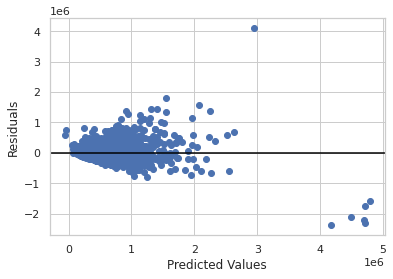

In [113]:
# Plot the residuals

fig, ax = plt.subplots()

ax.scatter(y_predicted, y_test - y_predicted)
ax.axhline(y=0, color="black")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals");

## Analysis

In our model, about 63% of the variance of the price can be explained by the all the factors in the dataset hence based on the fact our model is able to moderetely predict the price of a house given the above factors.

When we plot the Actual values against the predicted values we can see that our model has a moderete fit as the points are somehow close to the line indicating a moderete linear relationship between the accurate values and the predicted values.

When we plot the residuals we can still conclude that our model has a moderete fit as our points are somehow scattered around the zero line.


## Baseline Model : Simple linear Regression

Our target variable is price. We now look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price. We will then use that predictor to build our baseline model

In [114]:
# find the predictor variable with the highest correlation with price
data.corr()['price']

price           1.000000
bedrooms        0.306229
bathrooms       0.509650
sqft_living     0.703204
sqft_lot        0.086619
floors          0.236302
waterfront      0.262063
yr_built        0.050399
yr_renovated    0.129887
sell_yr         0.002535
Name: price, dtype: float64

We have found out that the 'sqft_living' column has the highest co-effecient and we will use it to build our baseline model. We then initialize our X and Y variables for our simple regression model.

In [115]:
# Create a design matrix X and target variable y
X = data[['sqft_living']]
y = data['price']


In [116]:
# Library to be used in building the model
import statsmodels.api as sm

# Building the model
baseline_model = sm.OLS(y, sm.add_constant(X))

# fitting the model
baseline_results = baseline_model.fit()

# viewing the summary of the model
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.732e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:25   Log-Likelihood:            -2.4596e+05
No. Observations:               17704   AIC:                         4.919e+05
Df Residuals:                   17702   BIC:                         4.919e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.731e+04   4878.907     -9.697      

## Analysis

Overall this base model is statistically significant and explains about 49% of the variance in price. 

* The intercept is at about -47.3k.
* This means that home with 0 Square footage of living space  would have a price of -47.3k dollars.
* The coefficient for Square footage of living space is about 282.
* This means for each additional Square footage of living space, the sale price of the home will increase with about 282 dollars more.

In [117]:
RMSE = ((baseline_results.resid ** 2).sum() / len(y) ** 0.5)
RMSE

9090492497284.77

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 9090492497284 in a given prediction.

## Visualize The Model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


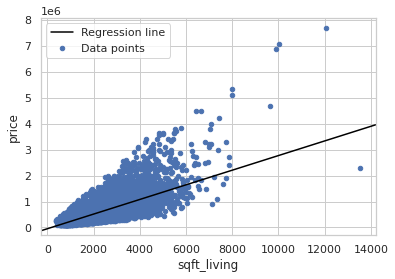

In [118]:
# Plot the model fit (scatter plot and regression line)
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color = 'black')
ax.legend();

## Multiple Linear Regression
## Model 1
Since we have our baseline model, we will then include other features that seem to have an inpact on the price for our model having multiple features.The features selected are listed below.

In [119]:
X_model1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront','floors', 'yr_built', 'yr_renovated']]

We then build our first Multiple linear regression model based on these features, fit the model and get its summary

In [120]:
model1 = sm.OLS(y, sm.add_constant(X_model1))
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     3159.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:26   Log-Likelihood:            -2.4414e+05
No. Observations:               17704   AIC:                         4.883e+05
Df Residuals:                   17695   BIC:                         4.884e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.168e+06   1.53e+05     40.321   

## Interpreting the model results
Overally the model performed marginally better. It explained 58.8% rather than 49% of the
variance in price.
All of the coefficients are statistically significant  with an F-statistic and t-statistic p-values well below 0.05

* The intercept is at about 6168000. Meaning when all features are at a 0 ath the year 1900, the price of a home will be 6168000.
* For each increase of 1 in number of bedrooms, we see an associated decrease in salePrice of about 59160
* For each increase of 1 in number of bathrooms, we see an associated increase in salePrice of about 63290
* For each increase of 1 Square footage of living space, we see an associated increase in salePrice of about 297
* For each increase of 1 Square footage of lot space, we see an associated negligable decrease in salePrice
* The presence of a waterfront increase in salePrice with about 756100
* For each increase of a floor, we see an associated increase in salePrice of about 53190
* For each year after the year built, we see an associated decrease in salePrice of about 3163
* For each year a house is renovated there is an associated increase in salePrice of about 12

### Residual Plot of Model 1

Text(0, 0.5, 'residuals')

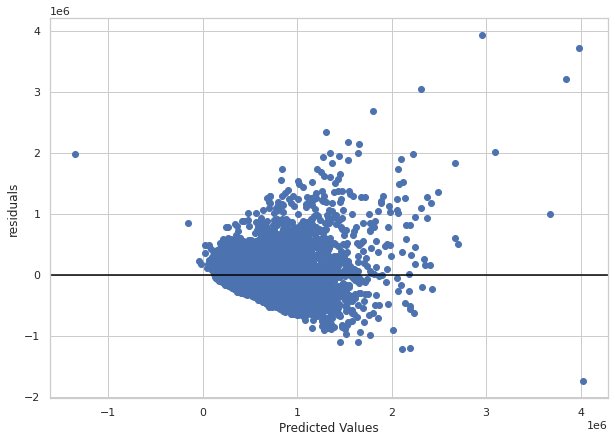

In [121]:
fig, axes = plt.subplots(figsize=(10,7), sharey=True)

y_predicted1 = results1.predict(sm.add_constant(X_model1))

weight_ax = axes
weight_ax.scatter(y_predicted1, results1.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("Predicted Values")
weight_ax.set_ylabel("residuals")

In [122]:
RMSE = ((results1.resid ** 2).sum() / len(y)) ** 0.5
RMSE

235926.6751450893

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 235926 in a given prediction.

## Adding Categorical features to the model: 
## Model 2
For now the model is behaving quite well with the numerical features we included. We now include some categorical features to see if the model can perform any better.<br>
We add the `condition` to see if it will have an impact on the price of the home.

In [123]:
X_model2 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'yr_renovated','condition']]


### One-hot encoding categorical columns
When dealing with categorical features we have to create dummy variables, using one-hot encoding, that contain integer values that can be used by our model. Since we have only one categorical feature, we will perform one-hot encoding to that column only.<br>
We also need to drop the first column of the dummy variable so that it can be used as a reference variable in the interpretation of results of the model

In [124]:
# creating dummy variables of the condition column and dropping its first dummy column
X_two = pd.get_dummies(X_model2, columns=['condition'], drop_first=True)


In [125]:
# removing the space in the column names to make them more understandable
X_two.columns = X_two.columns.str.replace(' ', '')
X_two

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,yr_renovated,condition_Fair,condition_Good,condition_Poor,condition_VeryGood
id,,,,,,,,,,,,
7129300520,3,1,1180,5650,1,0.0,1955,0.0,0,0,0,0
6414100192,3,2,2570,7242,2,0.0,1951,1991.0,0,0,0,0
2487200875,4,3,1960,5000,1,0.0,1965,0.0,0,0,0,1
1954400510,3,2,1680,8080,1,0.0,1987,0.0,0,0,0,0
7237550310,4,4,5420,101930,1,0.0,2001,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2,1530,1131,3,0.0,2009,0.0,0,0,0,0
6600060120,4,2,2310,5813,2,0.0,2014,0.0,0,0,0,0
1523300141,2,0,1020,1350,2,0.0,2009,0.0,0,0,0,0


After encoding the categorical columns we then get back to building the model, fitting it and interpreting its results

In [126]:
model2 = sm.OLS(y, sm.add_constant(X_two))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     2115.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:31   Log-Likelihood:            -2.4412e+05
No. Observations:               17704   AIC:                         4.883e+05
Df Residuals:                   17691   BIC:                         4.884e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.879e+06   1.62

## Interpreting the model results
The model explained 58.9%  of the variance in price which is just similar to the previous model.
The Model is statistically significant  with an F-statistic well below a significance level of 0.05
Most of the coefficients are statistically significant apart from `condition_poor` which has a pvalue of 0.205

The reference category for condition is `condition_average`.
The interpretation of the results of the categorical column are as follows
* For a home having a fair condition compared to a home with average condition, we see an associated decrease in price of about 49510
* For a home having a good condition compared to a home with average condition, we see an associated increase in price of about 13110
* For a home having a very good condition compared to a home with average condition, we see an associated increase in price of about 42820.<br>
We did include the homes with poor conditions since it was not statistically significant at a significance level of 0.05



### Residual Plot of Model 2

Text(0, 0.5, 'residuals')

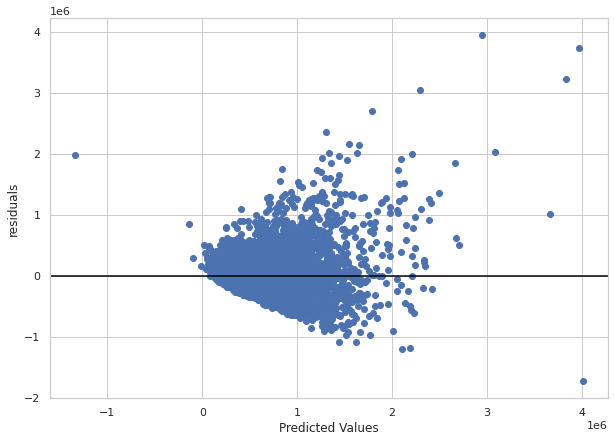

In [127]:
fig, axes = plt.subplots(figsize=(10,7), sharey=True)

y_predicted2 = results2.predict(sm.add_constant(X_two))

weight_ax = axes
weight_ax.scatter(y_predicted2, results2.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("Predicted Values")
weight_ax.set_ylabel("residuals")

In [128]:
RMSE = ((results2.resid ** 2).sum() / len(y)) ** 0.5
RMSE

235598.03527158155

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 235598 in a given prediction.

## Model 3 with `grade`
This model doesnt have any change as compared to the previous model, we surely need to improve this model in order to get a better performing model. We decided to use the `grade` feature in place of the condition to get which is a better feature to be used.

In [129]:
X_model3 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'yr_built', 'yr_renovated','grade']]

We then go ahead and do some cleaning on the grade columnn so as to make it more understandable. When we try to do value counts in the grade column, we see that its values have a mixture of numbers and words. We want to remove the numbers and remain with the words for easier understanding and interpretation.

In [130]:
data['grade'].value_counts()

Average       7338
Good          4979
Better        2168
LowAverage    1674
VeryGood       930
Excellent      324
Fair           190
Luxury          71
Low             18
Mansion         11
Poor             1
Name: grade, dtype: int64

We the one-hot encode the `grade` column.

In [131]:
X_three = pd.get_dummies(X_model3, columns=['grade'], drop_first=True)

#### Create the model

In [132]:
model3 = sm.OLS(y, sm.add_constant(X_three))
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1987.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:33   Log-Likelihood:            -2.4220e+05
No. Observations:               17704   AIC:                         4.844e+05
Df Residuals:                   17685   BIC:                         4.846e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.115e+06   1.43e+05  

## Interpreting the model results
The model explained 66.9%  of the variance in price which is a better performance as compared to the previous model.
The Model is statistically significant  with an F-statistic well below a significance level of 0.05.
All of the coefficients are statistically significant with pvalues way below the significance level.

The reference category for `grade` is `grade_Average`.
The interpretation of the results of the `grade` categorical column are in comparison to the reference column, `grade_10VeryGood`.
Homes having a grade above the average grade have an associated increase in price while those that have a grade lower than the average ave an associated decrease in price.<br>
* For a home having a Better grade compared to a home with a Average grade, we see an associated increase in price of about 237000.
* For a home having a fair grade compared to a home with a Average grade, we see an associated decrease in price of about 143400.<br>


### Residual Plot of Model 3

Text(0, 0.5, 'residuals')

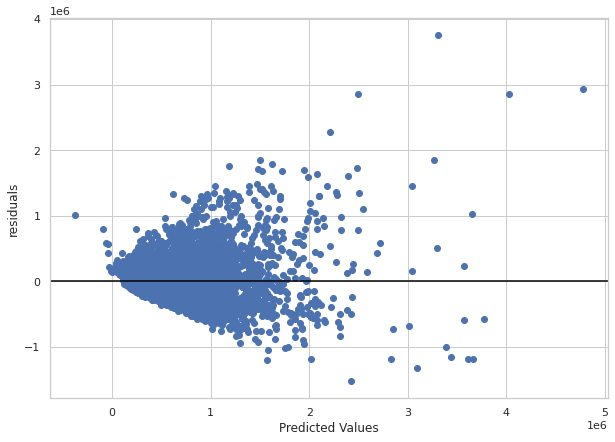

In [133]:
fig, axes = plt.subplots(figsize=(10,7), sharey=True)

y_predicted3 = results3.predict(sm.add_constant(X_three))

weight_ax = axes
weight_ax.scatter(y_predicted3, results3.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("Predicted Values")
weight_ax.set_ylabel("residuals")

In [134]:
RMSE = ((results3.resid ** 2).sum() / len(y)) ** 0.5
RMSE

211466.87900318124

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 211466 in a given prediction.

## Model 4 : Including an additional categorical column; `view`
For this new model we want to improve the previous model in order to obtain more optimal results. We are adding the `view` column to the model to see its impact to the model.<br>
since we have two categorical columns, the same process of one-hot encoding still needs to be done and reference columns are dropped.

In [135]:
X_model4 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'yr_renovated','grade','view']]
X_four = pd.get_dummies(X_model4, columns=['grade', 'view'], drop_first=True)
X_four.columns = X_four.columns.str.replace(' ', '')

model4 = sm.OLS(y, sm.add_constant(X_four))
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1690.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:34   Log-Likelihood:            -2.4197e+05
No. Observations:               17704   AIC:                         4.840e+05
Df Residuals:                   17681   BIC:                         4.842e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.817e+06   1.42e+05  

## Interpreting the model results
The model explained 67.7%  of the variance in price which is 1% better than the previous model.
The Model is statistically significant  with an F-statistic well below a significance level of 0.05.
Most of the coefficients are statistically significant with pvalues way below the significance level, apart from grade_Poor which has a pvalue of 0.7.

The reference category for `grade` is `grade_Average` and for `view` is `view_AVERAGE`.
##### The interpretation of the results of the `grade` categorical column are in comparison to the reference column, `grade_10VeryGood`.
Homes having a grade above the average grade have an associated increase in price while those that have a grade lower than the average ave an associated decrease in price.<br>
* For a home having a Excellent grade compared to a home with a Average grade, we see an associated increase in price of about 651900.
* For a home having a LowAverage grade compared to a home with a Average grade, we see an associated decrease in price of about 87770.<br>

##### The interpretation of the results of the `view` categorical column are in comparison to the reference column, `view_AVERAGE`.
* For a home having a Excellent view compared to a home with a Average view, we see an associated increase in price of about 195500.
* For a home having a NO view compared to a home with a Average view, we see an associated decrease in price of about 65290.<br>


### Residual Plot of Model 4

Text(0, 0.5, 'residuals')

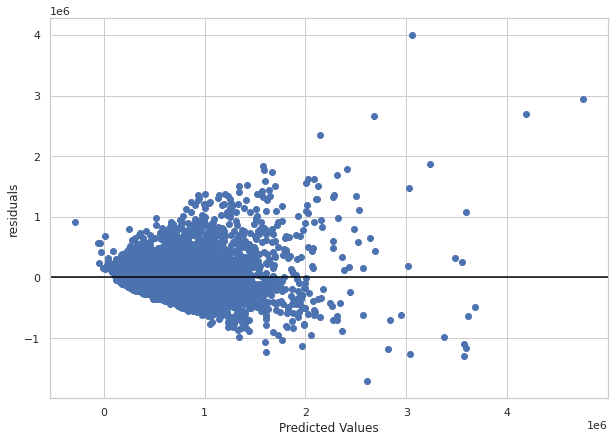

In [136]:
fig, axes = plt.subplots(figsize=(10,7), sharey=True)

y_predicted4 = results4.predict(sm.add_constant(X_four))

weight_ax = axes
weight_ax.scatter(y_predicted4, results4.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("Predicted Values")
weight_ax.set_ylabel("residuals")

In [137]:
RMSE = ((results4.resid ** 2).sum() / len(y)) ** 0.5
RMSE

208713.42312955743

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 208713 in a given prediction.

## Model 5: Optimizing model 4
We have quite a bit of features that we are using in determining the price of the homes. Are all these features relevant? Can we get to use fewer features and get a better performing model?<br>
In order to answer these questions we just pick a few of the features and use them to build another model and we compare its performance to the other models.

In [138]:
X_model5 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade']]
X_five = pd.get_dummies(X_model5, columns=['grade'], drop_first=True)
X_five.columns = X_five.columns.str.replace(' ', '')

model5 = sm.OLS(y, sm.add_constant(X_five))
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1766.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:54:34   Log-Likelihood:            -2.4425e+05
No. Observations:               17704   AIC:                         4.885e+05
Df Residuals:                   17689   BIC:                         4.887e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.701e+05   7747.727  

### Interpreting the model results
The model explained 58.3%  of the variance in price which is lower as compared to the previous model.

The Model is statistically significant  with an F-statistic well below a significance level of 0.05
Most of the coefficients are statistically significant apart from `grade_Poor` and `grade_low` which have a pvalue of 0.905 and 0.371 respectively.

This clearly shows that all features included in the Model 4 are of great importance to the model.


### Residual Plot of Model 5

Text(0, 0.5, 'residuals')

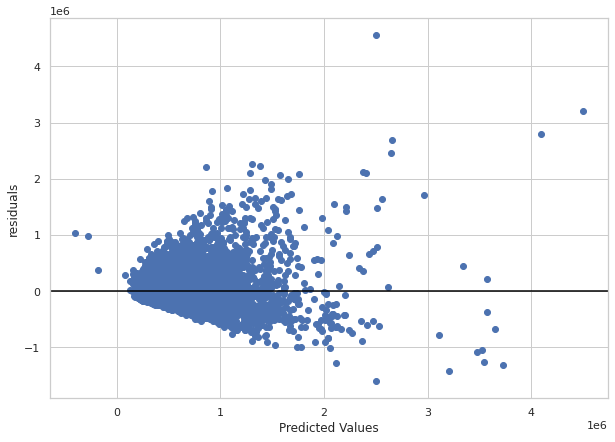

In [139]:
fig, axes = plt.subplots(figsize=(10,7), sharey=True)

y_predicted5 = results5.predict(sm.add_constant(X_five))

weight_ax = axes
weight_ax.scatter(y_predicted5, results5.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("Predicted Values")
weight_ax.set_ylabel("residuals")

In [140]:
RMSE = ((results5.resid ** 2).sum() / len(y)) ** 0.5
RMSE

237429.7629204154

#### Root Mean Squared Error(RMSE) Interpretation
For this RMSE value in our model, it means that our model is off by a price of about 208713 in a given prediction.

## Recommendation of the Model
From the five models that we built, we have the following summarissed results for all the models
* Baseline Model:    R-squared = 49.4 $\;\;\;\;\;$ Root Mean Squared Error = 9090492497284
* Model1:    R-squared = 58.8% $\;\;\;\;\;\;\;\;\;\;\;\;$ Root Mean Squared Error = 235926
* Model2:    R-squared = 58.9% $\;\;\;\;\;\;\;\;\;\;\;\;$ Root Mean Squared Error = 235598
* Model3:    R-squared = 66.9% $\;\;\;\;\;\;\;\;\;\;\;\;$ Root Mean Squared Error = 211466
* Model4:    R-squared = 67.8% $\;\;\;\;\;\;\;\;\;\;\;\;$ Root Mean Squared Error = 208713 
* Model5:    R-squared = 58.3% $\;\;\;\;\;\;\;\;\;\;\;\;$ Root Mean Squared Error = 208713

From the above results it will be in our best interest to pick the Model offerring the lowest error and the Highest R-squared value.<br>
We have chosen **Model 4** as our best model since it has the best R-squared value and the least error.